In [1]:
#!pip3 install xgboost

In [2]:
# https://datahack.analyticsvidhya.com/contest/black-friday/
# https://matplotlib.org/examples/color/named_colors.html
# Objetivo: Prever o valor da compra do cliente baseado nos produtos
# Algumas colunas foram mascaradas, isto é, eles trocaram os valores originais.

# bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# bibliotecas para visualizar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# bibliotecas para algoritmos de machine learning
from sklearn.model_selection import train_test_split
from sklearn.svm  import SVR
from sklearn.metrics import explained_variance_score
import xgboost 

#comandos mágicos
%matplotlib inline
%config InlineBackend.figure_format='retina'

/home/breno/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/breno/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/breno/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/breno/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/breno/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/breno/anaconda3/lib/python3.6/importlib/_boo

In [3]:
file = "../Dados/train.csv"
df = pd.read_csv(file)

# Exploratory analysis

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# there is many NAn values in product category 2 and 3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe(include = [np.number])

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.describe(exclude = [np.number])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [8]:
df.skew()

User_ID               0.003066
Occupation            0.400140
Marital_Status        0.367437
Product_Category_1    1.025735
Product_Category_2   -0.162758
Product_Category_3   -0.765446
Purchase              0.600140
dtype: float64

In [9]:
print("Category 1:", df['Product_Category_1'].unique())
print("Category 2:", df['Product_Category_2'].unique())
print("Category 3:", df['Product_Category_3'].unique())
print("Occupation:", df['Occupation'].unique())
print("City_Category:", df['City_Category'].unique())

Category 1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Category 2: [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Category 3: [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Occupation: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category: ['A' 'C' 'B']


In [10]:
# acredito que os números dentro das colunas categorias são como subcategorias
# valor 0 em categoria significa que não tem categoria
df.fillna(0, inplace=True)

In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


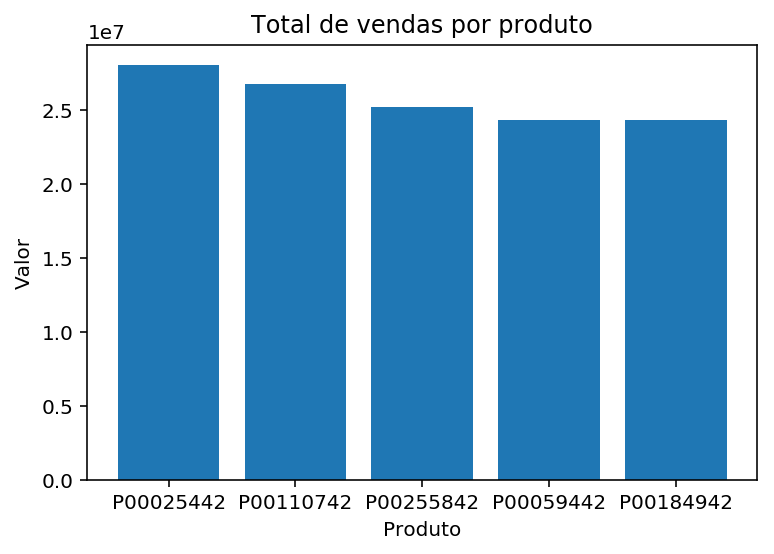

In [12]:
product_n_price = df.groupby(["Product_ID"]).Purchase.sum().sort_values(ascending=False)[0:5]
plt.bar(product_n_price.keys(), product_n_price.values, align='center')
plt.xlabel("Produto")
plt.ylabel("Valor")
plt.title("Total de vendas por produto")
plt.show()

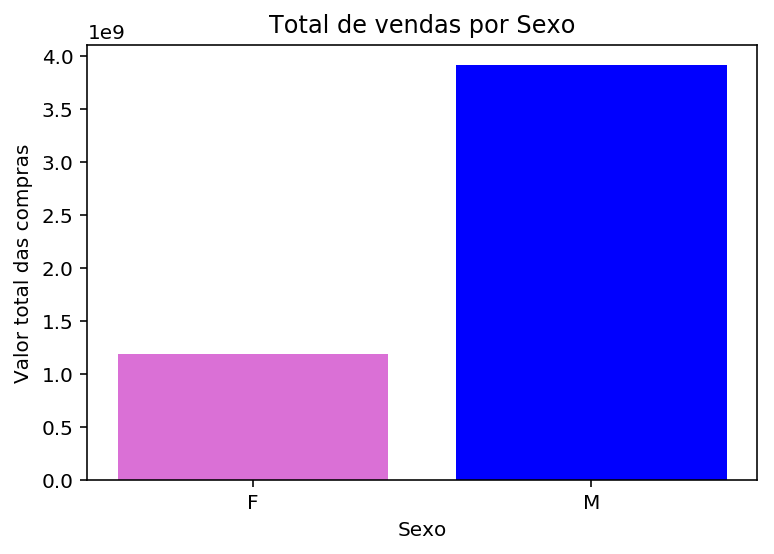

In [13]:
compra_por_genero = df.groupby(['Gender']).Purchase.sum()
plt.bar(compra_por_genero.keys(), compra_por_genero.values, align='center', color = ['orchid', 'Blue'])
plt.xlabel("Sexo")
plt.ylabel("Valor total das compras")
plt.title("Total de vendas por Sexo")
plt.show()

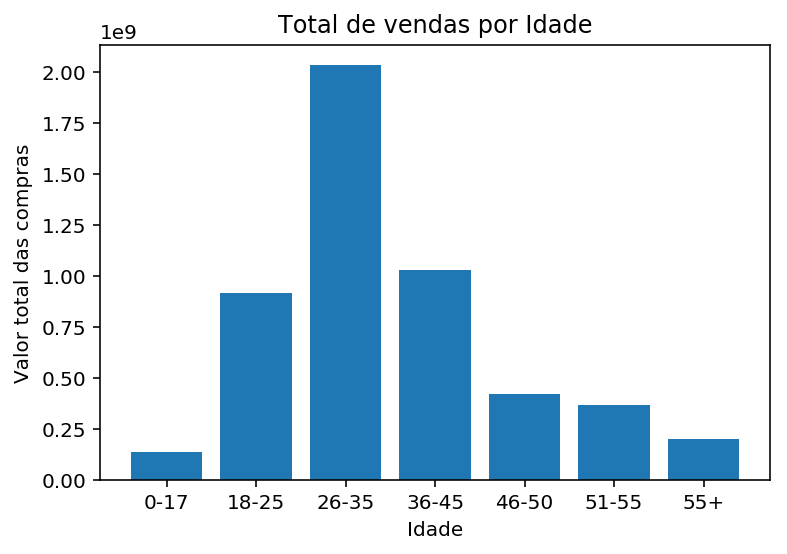

In [14]:
compra_por_genero = df.groupby(['Age']).Purchase.sum()
plt.bar(compra_por_genero.keys(), compra_por_genero.values, align='center')
plt.xlabel("Idade")
plt.ylabel("Valor total das compras")
plt.title("Total de vendas por Idade")
plt.show()

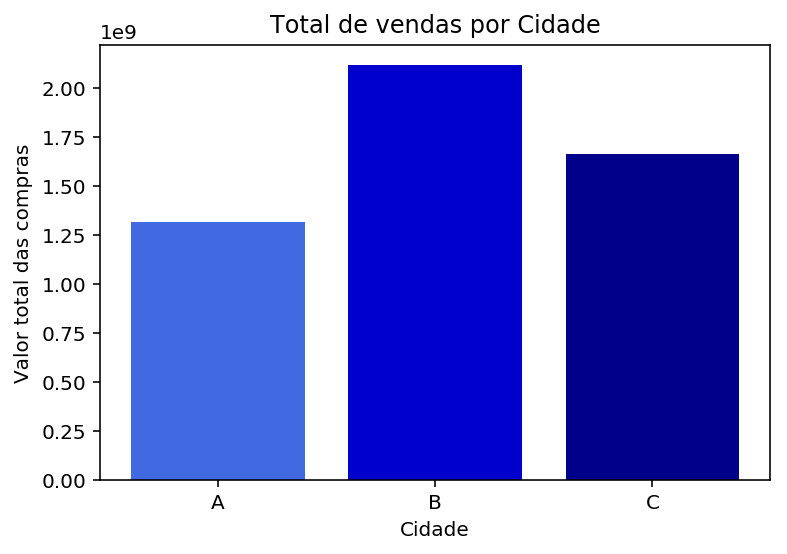

In [15]:
compra_por_genero = df.groupby(['City_Category']).Purchase.sum()
cor = ['royalBlue', 'mediumBlue', 'darkBlue']
plt.bar(compra_por_genero.keys(), compra_por_genero.values, align='center', color=cor)
plt.xlabel("Cidade")
plt.ylabel("Valor total das compras")
plt.title("Total de vendas por Cidade")
plt.show()

In [16]:
compra_sex_EstCivil = df.groupby(['Gender', 'Marital_Status']).Purchase.sum()
compra_sex_EstCivil
# vemos que pessoas solteiras compram mais produtos

Gender  Marital_Status
F       0                  684154127
        1                  502078515
M       0                 2324773320
        1                 1584806780
Name: Purchase, dtype: int64

In [17]:
# https://matplotlib.org/examples/statistics/histogram_demo_multihist.html
df.groupby(['Gender', 'Age']).Purchase.sum()

Gender  Age  
F       0-17       42385978
        18-25     205475842
        26-35     442976233
        36-45     243438963
        46-50     116706864
        51-55      89465997
        55+        45782765
M       0-17       92527205
        18-25     708372833
        26-35    1588794345
        36-45     783130921
        46-50     304136539
        51-55     277633647
        55+       154984610
Name: Purchase, dtype: int64

In [18]:
# provavelmente, as ocupações em primeiro no rank são as que têm melhor remuneração
df.groupby(['Occupation']).Purchase.sum().sort_values(ascending=False)

Occupation
4     666244484
0     635406958
7     557371587
1     424614144
17    393281453
12    305449446
20    296570442
14    259454692
16    238346955
2     238028583
6     188416784
3     162002168
15    118960211
10    115844465
5     113649759
11    106751618
19     73700617
13     71919481
18     60721461
9      54340046
8      14737388
Name: Purchase, dtype: int64

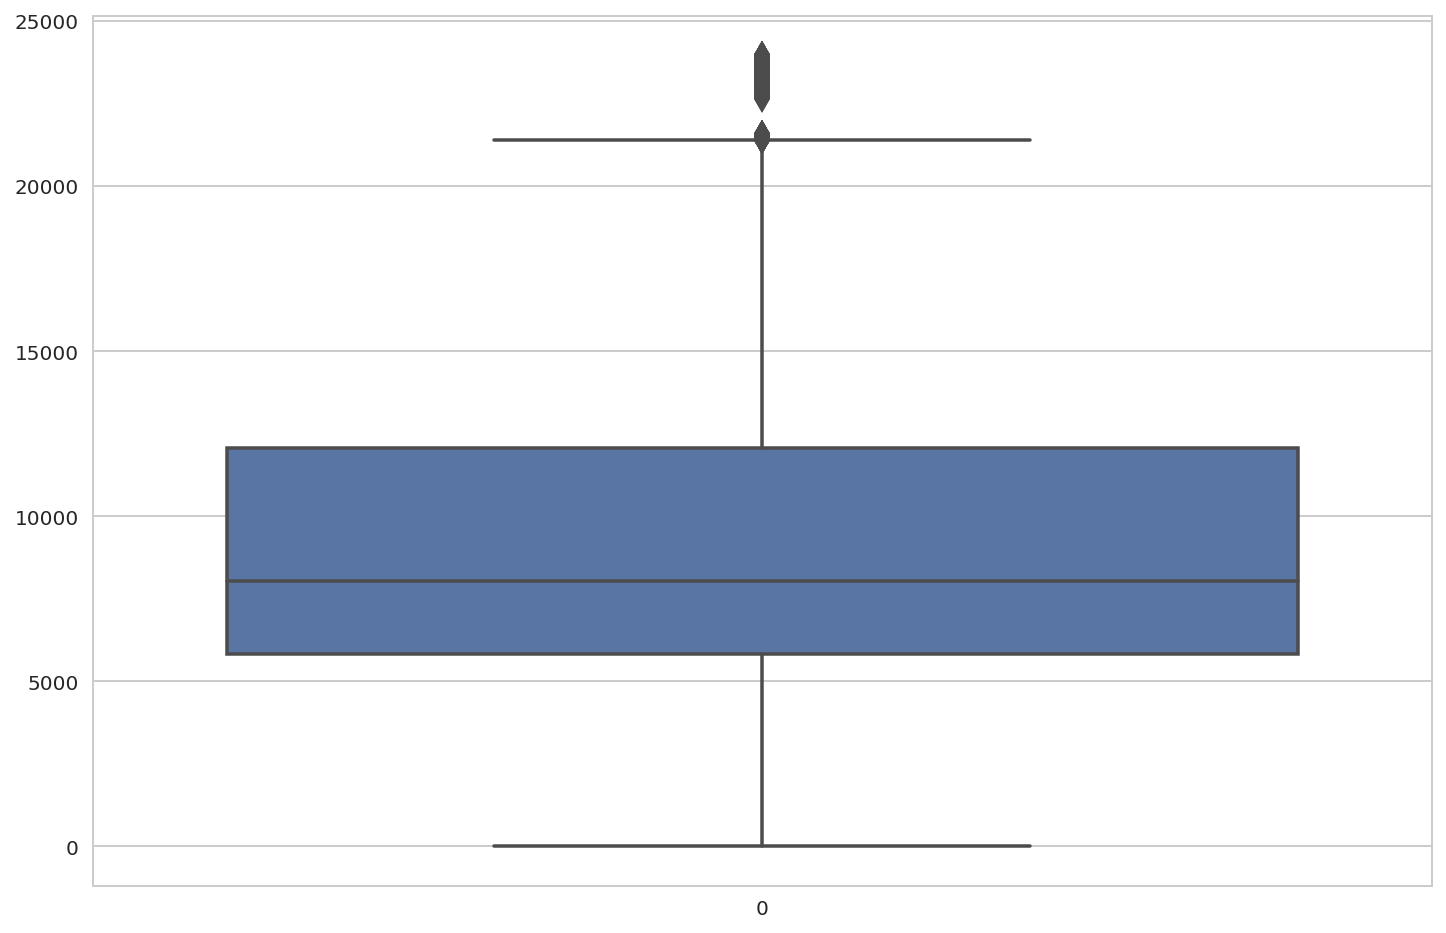

In [19]:
# verificando outliers. Não retirarei os outliers por enquanto
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(12,8))
sns.boxplot(data=df['Purchase'], fliersize=10)

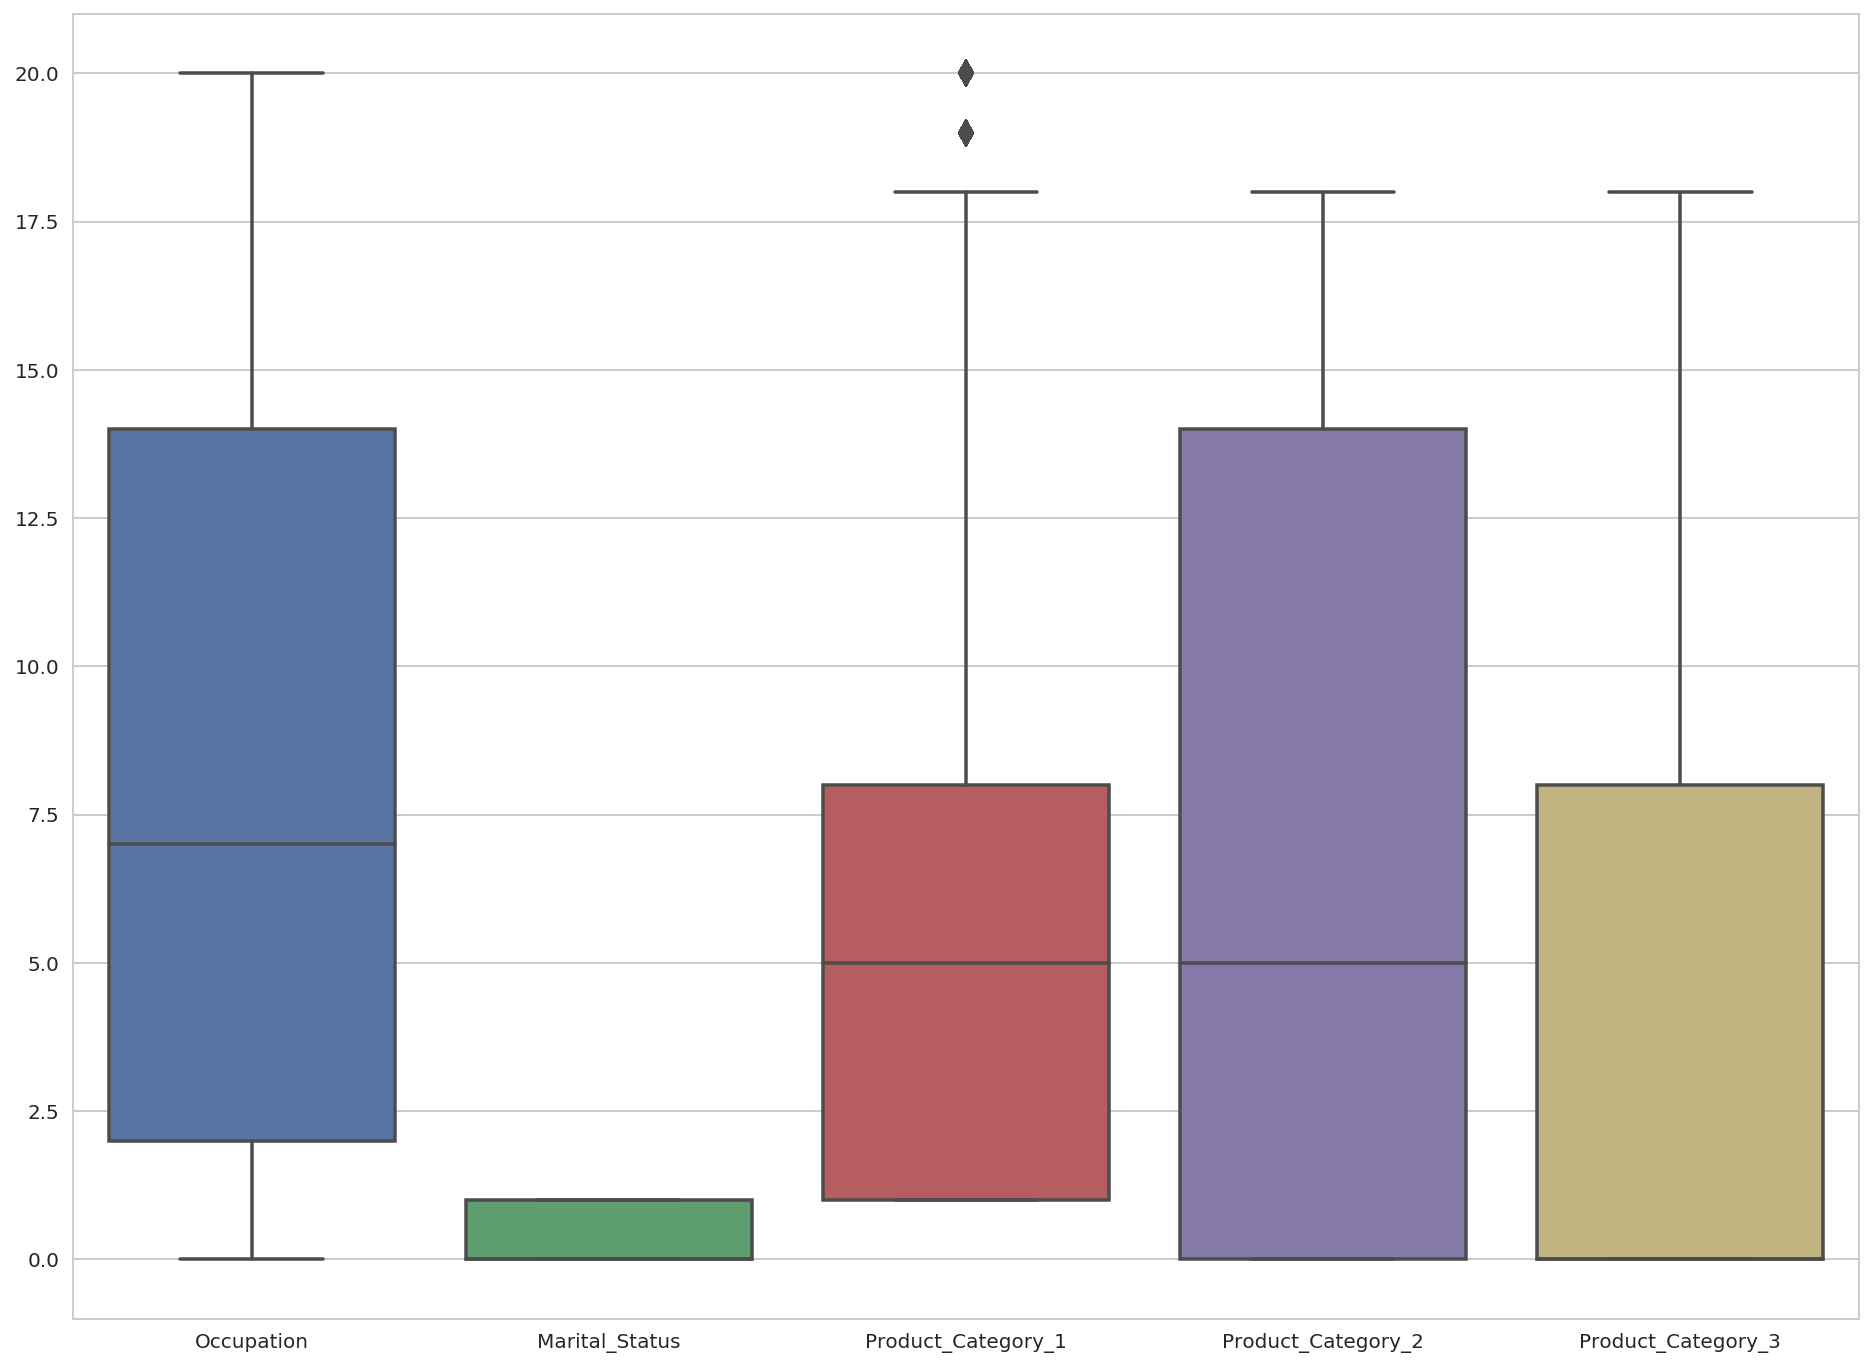

In [20]:
# verificando outliers
col_numeric = ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(16,12))
sns.boxplot(data=df[col_numeric], fliersize=10)

# Transformação dos dados

In [21]:
# tem que colocar todas as colunas como numéricas
User_id = df.User_ID
Product_id = df.Product_ID
df.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)

In [22]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,M,26-35,20,A,1,1,8,0.0,0.0,7871


In [23]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [24]:
def sex_to_numeric(x):
    if(x == 'F'):
        # female
        return(0)
    else:
        #male
        return(1)

def cityYears_to_numeric(x):
    if(x == '0'):
        return(0)
    elif(x == '1'):
        return(1)
    elif(x == '2'):
        return(2)
    elif(x == '3'):
        return(3)
    else:
        # 4+
        return(4)

def cityCat_to_numeric(x):
    if(x == "A"):
        return(1)
    elif(x == "B"):
        return(2)
    else:
        # C
        return(3)

def age_to_numeric(x):
    if(x == '0-17'):
        return(1)
    elif(x == '18-25'):
        return(2)
    elif(x == '26-35'):
        return(3)
    elif(x == '36-45'):
        return(4)
    elif(x == '46-50'):
        return(5)
    elif(x == '51-55'):
        return(6)
    else:
        # 55+
        return(7)
    
def occu_to_numeric(x):
    return(int(x))

def normalizar(x):
    v = (x - min(x))/(max(x) - min(x))
    return(v)

In [25]:
# aplicando as funções
df.Gender = df.Gender.apply(sex_to_numeric)
df.Age = df.Age.apply(age_to_numeric)
df.City_Category = df.City_Category.apply(cityCat_to_numeric)
df.Occupation = df.Occupation.apply(occu_to_numeric)
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.apply(cityYears_to_numeric)

# Criando os modelos de ML

In [26]:
train, test = train_test_split(df, test_size = 0.2)

In [27]:
train_target = train.Purchase
train.drop(['Purchase'], axis = 1, inplace=True)

/home/breno/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
test_target = test.Purchase
test.drop(['Purchase'], axis = 1, inplace=True)

/home/breno/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
# aplicar a normalização.


In [29]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7) 

In [30]:
xgb_model.fit(train, train_target)

/home/breno/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/breno/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:10:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.75, verbosity=1)

In [31]:
pred = xgb_model.predict(test)
explained_variance_score(pred, test_target)

0.4929819578582919

In [32]:
result = pd.DataFrame({'real':test_target, 'previsto':pred})
#result